In [1]:
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np

In [2]:
SPEED_CREEP = 0.12

In [3]:
class TestCase(NamedTuple):
    label: str
    v_max: float
    t_max: float
    d_creep: float
    color: str


test_cases = [
    TestCase(label="No Load", v_max=6, t_max=10, d_creep=0.2, color="#1f3"),
    TestCase(label="Light Load", v_max=6, t_max=15, d_creep=0.3, color="#19f"),
    TestCase(label="Normal Load", v_max=5, t_max=15, d_creep=0.3, color="#fe2"),
    TestCase(label="Heavy Load", v_max=2, t_max=10, d_creep=0.3, color="#f61"),
]

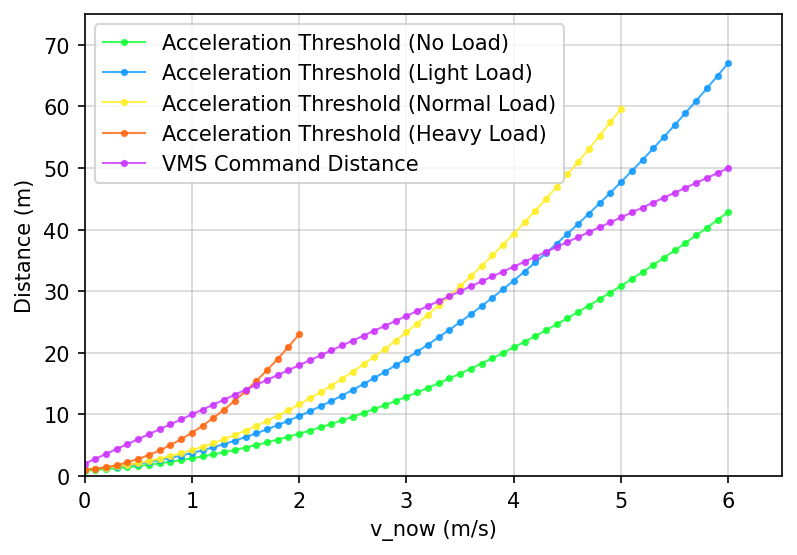

In [4]:
fig = plt.figure(figsize=(6, 4), dpi=150)
fig.set_facecolor("#fff")
ax = fig.add_subplot()

for label, v_max, t_max, d_creep, color in test_cases:
    a = v_max / t_max
    v_now = np.arange(0, v_max + 1e-3, 0.1)
    d_deceleration = 0.5 * (v_now ** 2 - 0.12 ** 2) / (a - 0.1)
    # threshold = d_deceleration
    threshold = d_deceleration + 2 * d_creep + 0.5 * v_now \
        + 0.5 * v_now + 0.5
    ax.plot(v_now, threshold, ".-", color=color, lw=1, ms=5,
            alpha=0.8, label=f"Acceleration Threshold ({label})")

v = np.arange(0, 6 + 1e-3, 0.1)
d_vms = 8 * v + 2
ax.plot(v, d_vms, ".-", color="#c3f", lw=1, ms=5,
        alpha=0.8, label="VMS Command Distance")

ax.set(
    xlabel="v_now (m/s)",
    ylabel="Distance (m)",
    xlim=(0, 6.5),
    ylim=(0, 75),
)
ax.legend()
ax.grid(alpha=0.5)